# Empirical Application of Multilayer gravity Models

This notebook shows the procedures to obtain the results shown in the paper Multilayer gravity Models. 

## The Data

A full description of the Data is provided in the article. In summary, the data used comes from three different sources: the IMF, UNTWO, and CEPI. From this sources I obtain data about foreing direct investment, trade flows, and tourism. This allows create a 3-layered network that I use to illustrate the proposed estimator.

## The Matrix

The treatment of each individual source is explained in the document. I show the filtering and missing value procedure

In [366]:
# load libraries
library(skimr)
library(tidyverse)
library(data.table)

# specify path
dpath  <-  "~/Dropbox/datatesis/gravfol"

#read data and filter  
data <- fread(paste0(dpath,"/mlayerdata.csv"))

data <- data  %>% dplyr::select(c(iso3num_o,
             iso3num_d,year,tourism,fdi,fdi2, contig:tradeflow_imf_d))  %>% 
             filter(year==2015)  %>% dplyr::select(-c(empire))

 data  <- data %>% mutate(
     across(c(tourism:tradeflow_imf_d), ~replace_na(.x, 0))
   )

data  <-  data %>% filter(!(is.na(iso3num_d) | is.na(iso3num_o) ))

data %>% glimpse()


Rows: 61,009
Columns: 75
$ iso3num_o              <int> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,…
$ iso3num_d              <int> 4, 8, 10, 12, 16, 20, 24, 28, 31, 32, 36, 40, 4…
$ year                   <int> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ tourism                <dbl> 0, 0, 0, 0, 0, 0, 38, 97, 545, 0, 370, 0, 4, 0,…
$ fdi                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ fdi2                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ contig                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ dist                   <dbl> 303.761, 4342.117, 0.000, 5866.736, 0.000, 5806…
$ distw                  <dbl> 269.543, 4250.738, 0.000, 5776.018, 0.000, 5712…
$ distcap                <dbl> 303.761, 4342.117, 0.000, 5866.736, 0.000, 5806…
$ distwces               <dbl> 90.264, 4243.150, 0.000, 5759.415, 0.000, 5707.…
$ dist_source            <dbl> 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ comlang_off  

### Explore trade data

There are three possible sources for trade data. The concern is the scale. According to the data manual the data is expressed in thousands of dollars

In [248]:
print(data %>% dplyr::select(starts_with("tradeflow")) %>% skim())

print("DIvider ###############################################")
print(data %>% dplyr::select(starts_with("tradeflow")) %>% 
    mutate(across(starts_with("tradeflow"), ~.x / 1000 )) %>% 
    skim())

    data  <- data  %>% 
    mutate(across(starts_with("tradeflow"), ~.x / 1000 ))

── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             61009     
Number of columns          5         
Key                        NULL      
_______________________              
Column type frequency:               
  numeric                  5         
________________________             
Group variables            None      

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable        n_missing complete_rate    mean       sd    p0   p25
1 tradeflow_comtrade_o         0             1 245561. 4141441.     0     0
2 tradeflow_comtrade_d         0             1 251544. 4110826.     0     0
3 tradeflow_baci               0             1 258749. 3912874.     0     0
4 tradeflow_imf_o              0             1 261043. 4232814.     0     0
5 tradeflow_imf_d              0             1 261471. 4109191.     0     0
    p50   p75       p100 hist 
1     0  4

Tourism data is expressed in persons (surprisingly)

In [249]:
data %>% dplyr::select(starts_with("tourism")) %>% skim()

print("DIvider ###############################################")

print(data %>% dplyr::select(starts_with("tourism")) %>% 
   mutate(across(starts_with("tourism"), ~.x / 1000 )) %>% 
   skim())

data <- data %>%  
    mutate(across(starts_with("tourism"), ~.x / 1000 ))

── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             61009     
Number of columns          1         
Key                        NULL      
_______________________              
Column type frequency:               
  numeric                  1         
________________________             
Group variables            None      

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   mean      sd    p0   p25   p50   p75
1 tourism               0             1 19571. 482308.     0     0     0     1
      p100 hist 
1 79448100 ▇▁▁▁▁
[1] "DIvider ###############################################"
── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             61009     
Number of columns          1         
Key                        NULL      
____________

FDI expressed in dollars

In [250]:
data %>% dplyr::select(starts_with("fdi")) %>% skim()
print("DIvider ###############################################")
print(data %>% dplyr::select(starts_with("fdi")) %>% 
    mutate(across(starts_with("fdi"), ~.x / 1000000 )) %>% 
    skim())

data <- data  %>% 
    mutate(across(starts_with("fdi"), ~ case_when( .x >  0 ~ .x / 1000000, T ~ 0 ))) 

── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             61009     
Number of columns          2         
Key                        NULL      
_______________________              
Column type frequency:               
  numeric                  2         
________________________             
Group variables            None      

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate       mean           sd            p0
1 fdi                   0             1 417654618. 10479655665. -61848994702.
2 fdi2                  0             1 436264220. 10962684968. -20153536520.
    p25   p50   p75    p100 hist 
1     0     0     0 1.24e12 ▇▁▁▁▁
2     0     0     0 1.06e12 ▇▁▁▁▁
[1] "DIvider ###############################################"
── Data Summary ────────────────────────
                           Values    
Name                

In [1]:
require(parallel)
require(purrr)
require(gtools)
require('igraph')
require(gridExtra)
require(reshape2)
require(MASS)
require(Matrix)
patho <- "/home/diego/Documents/Thesis/MlayerSimul/"
source(paste0(patho,"scripts/DGPs.R"))
source(paste0(patho,"scripts/evalo.r"))
source(paste0(patho,"scripts/evalo2.r"))
source(paste0(patho,"scripts/makedata.R"))


Loading required package: parallel

Loading required package: purrr

Loading required package: gtools

Loading required package: igraph


Attaching package: ‘igraph’


The following object is masked from ‘package:gtools’:

    permute


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: gridExtra

Loading required package: reshape2

Loading required package: MASS

Loading required package: Matrix



In [367]:
data<- data %>% mutate( ldist = case_when( dist > 0 ~ log(dist), T ~ 0 ))
data %>% names()
list1 <- c("ldist","contig","comlang_off","comcol","rta")
data %>% dplyr::select(dist) %>% skim()


[1] "iso3num_o"              "iso3num_d"              "year"                  
 [4] "tourism"                "fdi"                    "fdi2"                  
 [7] "contig"                 "dist"                   "distw"                 
[10] "distcap"                "distwces"               "dist_source"           
[13] "comlang_off"            "comlang_ethno"          "comcol"                
[16] "comrelig"               "col45"                  "legal_old_o"           
[19] "legal_old_d"            "legal_new_o"            "legal_new_d"           
[22] "comleg_pretrans"        "comleg_posttrans"       "transition_legalchange"
[25] "heg_o"                  "heg_d"                  "col_dep_ever"          
[28] "col_dep"                "col_dep_end_year"       "col_dep_end_conflict"  
[31] "sibling_ever"           "sibling"                "sever_year"            
[34] "sib_conflict"           "pop_o"                  "pop_d"                 
[37] "gdp_o"                  "gdp_d"                  "gdpcap_o"              
[40] "gdpcap_d"               "pop_source_o"           "pop_source_d"          
[43] "gdp_source_o"           "gdp_source_d"           "gdp_ppp_o"             
[46] "gdp_ppp_d"              "gdpcap_ppp_o"           "gdpcap_ppp_d"          
[49] "pop_pwt_o"              "pop_pwt_d"              "gdp_ppp_pwt_o"         
[52] "gdp_ppp_pwt_d"          "gatt_o"                 "gatt_d"                
[55] "wto_o"                  "wto_d"                  "eu_o"                  
[58] "eu_d"                   "rta"                    "rta_coverage"          
[61] "rta_type"               "entry_cost_o"           "entry_cost_d"          
[64] "entry_proc_o"           "entry_proc_d"           "entry_time_o"          
[67] "entry_time_d"           "entry_tp_o"             "entry_tp_d"            
[70] "tradeflow_comtrade_o"   "tradeflow_comtrade_d"   "tradeflow_baci"        
[73] "manuf_tradeflow_baci"   "tradeflow_imf_o"        "tradeflow_imf_d"       
[76] "ldist"

── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             61009     
Number of columns          1         
Key                        NULL      
_______________________              
Column type frequency:               
  numeric                  1         
________________________             
Group variables            None      

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean    sd    p0   p25   p50    p75
1 dist                  0             1 7011. 5330.     0 2199. 6730. 11019.
    p100 hist 
1 19951. ▇▆▅▃▂


In [368]:
lista  <- names(data %>% dplyr::select(any_of(list1)))
listo  <-  names(data %>% dplyr::select(tourism,fdi,tradeflow_comtrade_d))
length(unique(data$iso3num_o))
length(unique(data$iso3num_d))

#,
obja <- makedata(data[,..listo],data[,..lista],data$iso3num_o,data$iso3num_d)


[1] 247

[1] 247

In [369]:
str(data[,..lista])
str(data[,..listo])
length(obja)

Classes ‘data.table’ and 'data.frame':	61009 obs. of  5 variables:
 $ ldist      : num  5.72 8.38 0 8.68 0 ...
 $ contig     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ comlang_off: num  0 0 0 0 0 0 0 0 0 0 ...
 $ comcol     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ rta        : num  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes ‘data.table’ and 'data.frame':	61009 obs. of  3 variables:
 $ tourism             : num  0 0 0 0 0 0 38 97 545 0 ...
 $ fdi                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ tradeflow_comtrade_d: num  0 6.94 0 1.18 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


[1] 6

In [370]:
strato <- list(c(1 ,2),c(1 ,3),c(2 ,1),
             c(3 ,1),c(2 ,3),c(3 ,2))



listerin  <- obja

init <- rep(1,length(listerin)-1)

#evalo(init,listerin,strato,250^2)

#evalo_g(init,listerin,strato,250^2)

optpar <- optim(init, fn = evalo, gr = evalo_g, method = "BFGS",
                simat = listerin, strobject = strato, 
                chosen=((250^2)*(3^2)))

print(optpar$par)

[1]  81.617879   4.238454   3.425078   1.163999 490.393778


In [74]:
sizo <- dim(data)[1]
set.seed(2020)

best <- lapply(c(1:250) , function(i){

ese <-  sample.int(sizo, size = sizo, replace = T)

objan <- makedata(data[ese,..listo],data[ese,..lista],data$iso3num_o,data$iso3num_d)

return( optim(init, fn = evalo, gr = evalo_g, method = "BFGS",
                simat = objan, strobject = strato, 
                chosen=((250^2)*(3^2)))$par )
})


In [75]:
best2 <- lapply(c(1:500) , function(i){

ese <-  sample.int(sizo, size = sizo, replace = T)

objan <- makedata(data[ese,..listo],data[ese,..lista],data$iso3num_o,data$iso3num_d)

return( optim(init, fn = evalo, gr = evalo_g, method = "BFGS",
                simat = objan, strobject = strato, 
                chosen=((250^2)*(3^2)))$par )
})

best3 <- lapply(c(1:1000) , function(i){

ese <-  sample.int(sizo, size = sizo, replace = T)

objan <- makedata(data[ese,..listo],data[ese,..lista],data$iso3num_o,data$iso3num_d)

return( optim(init, fn = evalo, gr = evalo_g, method = "BFGS",
                simat = objan, strobject = strato, 
                chosen=((250^2)*(3^2)))$par )
})

── Data Summary ────────────────────────
                           Values
Name                       b1    
Number of rows             1000  
Number of columns          1     
_______________________          
Column type frequency:           
  numeric                  1     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean    sd    p0   p25   p50   p75
1 data                  0             1  56.5  26.6  22.4  33.4  48.9  75.1
   p100 hist 
1  124. ▇▅▃▂▂
     2.5%     97.5% 
 24.47851 110.64637 
[1] 0.5441568


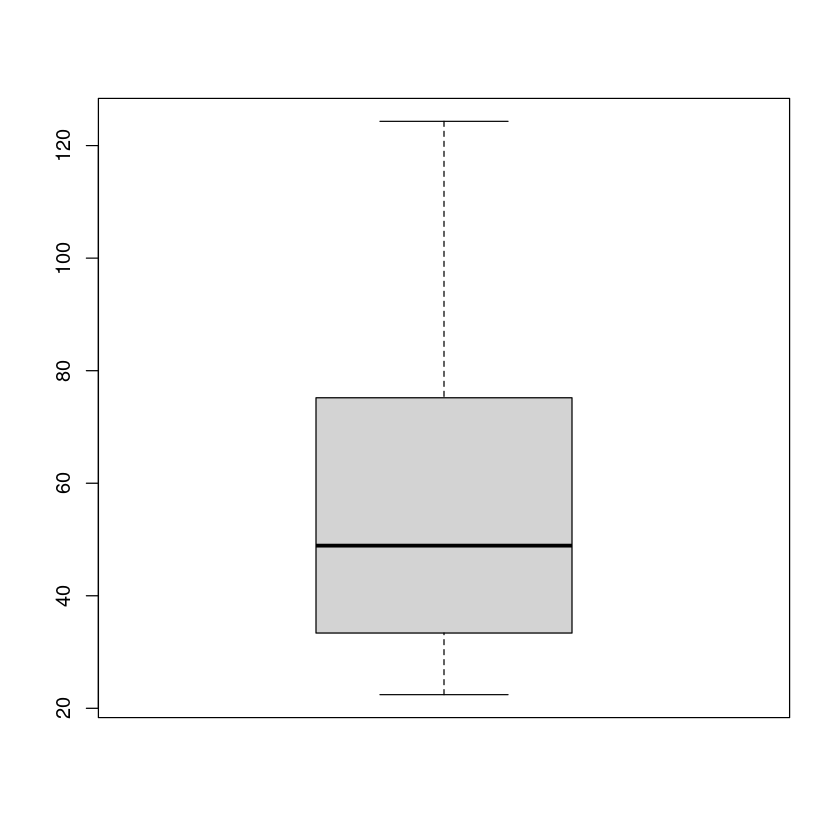

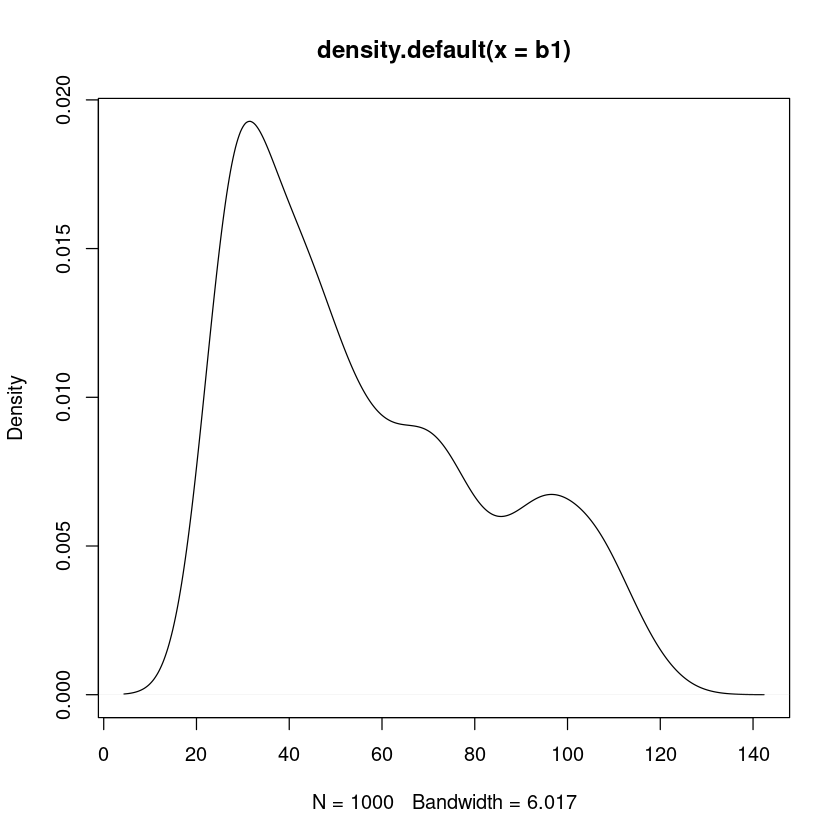

In [81]:
b1 <-lapply(best3,function(x){
    x[5]
})

b1<-unlist(b1)

skim(b1)

print(quantile(b1, c(0.025,0.975)))

print(sd(b1)/median(b1))


boxplot(b1)

plot(density(b1))

## OECD case

In [392]:
data_o <- data

oecd  <-  fread("~/Dropbox/datatesis/oecd_list.csv")

list1 <- c("ldist","comcol","rta")

data_o <- data_o %>% semi_join(oecd,by=c("iso3num_d"="iso3num")) %>% 
semi_join(oecd,by=c("iso3num_o"="iso3num"))

data_o <- data_o %>% mutate(const= 1)

In [393]:
lista  <- names(data_o %>% dplyr::select(any_of(list1)))
listo  <-  names(data_o %>% dplyr::select(fdi,tourism,tradeflow_comtrade_o))
length(unique(data_o$iso3num_o))
length(unique(data_o$iso3num_d))


objb <- makedata(data_o[,..listo],data_o[,..lista],data_o$iso3num_o,data_o$iso3num_d)

strato <- list(c(1 ,2),c(1 ,3),c(2 ,1),
             c(3 ,1),c(2 ,3),c(3 ,2))

             strato <- list(c(1 ,1),c(2 ,2),c(3 ,3),c(1 ,2),c(1 ,3),c(2 ,1),
             c(3 ,1),c(2 ,3),c(3 ,2))

#listerin  <- lister[c(1,7:30)]

init <- rep(-1,length(objb)-1)


optpar_o <- optim(init, fn = evalo, gr = evalo_g, method = "BFGS",
                simat = objb, strobject = strato, 
                chosen=((38^2)*(3^2)))

optpar_o

[1] 38

[1] 38

$par
[1] 57.2742130 -1.0008268  0.9070144

$value
[1] 0

$counts
function gradient 
      87        2 

$convergence
[1] 0

$message
NULL

In [171]:
siz_o <- dim(data_o)[1]
set.seed(312)

inito <- optpar_o$par
#inito <- rep(0,5)
best_o <- lapply(c(1:50) , function(i){

ese <-  sample.int(siz_o, size = siz_o, replace = T)

objan <- makedata(data_o[ese,..listo],data_o[ese,..lista],data_o$iso3num_o,data_o$iso3num_d)

return( optim(inito, fn = evalo, gr = evalo_g, method = "BFGS",
                simat = objan, strobject = strato, 
                chosen=((38^2)*(3^2)))$par )
})


In [136]:
sizo
dater <- lapply(c(1:10) , function(i){

ese <-  sample.int(siz_o, size = siz_o, replace = T)
length(unique(ese))
})

dater

[1] 61009

[[1]]
[1] 906

[[2]]
[1] 918

[[3]]
[1] 924

[[4]]
[1] 920

[[5]]
[1] 907

[[6]]
[1] 920

[[7]]
[1] 922

[[8]]
[1] 912

[[9]]
[1] 897

[[10]]
[1] 912

In [137]:
sample.int(siz_o,siz_o)

[1]  257  754  686 1031  103 1069  811 1288 1232  717 1050  206  641  175
  [15] 1163  560 1233  809  634  567  301  428 1281 1098  275  574  894  358
  [29] 1416  579 1307  996  762   16   22 1222  991  737 1165 1270  260  580
  [43]  386  782  429  194  967  240  725  149  931  129  270  276  772  812
  [57] 1129 1062 1370  549  408 1251  311  166  832  160 1336  816  189 1075
  [71]  689  569  768 1155 1202  970  188  411 1045  354  920  106  205  763
  [85]  892  280 1125  176  909  841 1395  885 1110  778  643  602 1365  472
  [99]  329 1097   59   17  746   80  397   18  307  153  668  937  851 1056
 [113]  623  749  605 1191  134 1026  118  597  335  633  192 1216  136 1029
 [127]  388  312  896  564  755  680  415 1211  302 1225  788 1073 1118  874
 [141] 1289  817  769  339  439 1291  143  131 1007 1432   79  198  347   92
 [155]  341 1266   67 1284 1443 1255   23  617  453  966 1175 1080  284 1180
 [169]  637  863  729   13  934  973 1396  474  511  294  957  802  405  777
 [183] 1008 1160  611    1 1044  468  699  795  622 1111  987  650 1011  187
 [197] 1302 1054  229 1095  620  552  879  317 1084   42   84 1300  423  829
 [211]  161  107  316  568  979  207   61  376 1005 1138  494  346  565  467
 [225]  853 1020  343  576  162  632  250 1275  964 1071  433  573  965  886
 [239]  481 1127  256 1282  900  550  758  744  578  531  958  855  823   73
 [253] 1003  181  868  148  499  873  793  975  199 1152 1201  675  899  999
 [267] 1312  718  444  810  121 1147  766   91   15  321 1226 1409  530   68
 [281]  618  850  140   39  570  649 1404 1189 1171 1074  711  702 1028 1229
 [295]  735  271 1428  327  822  856  195   32  595  213  291 1358  906 1174
 [309] 1400  834  544 1093  147  228 1398  866  452  238 1161  638 1241 1320
 [323]  865  959  167  690    3  209  771   72 1305  821 1353  191  767 1267
 [337]  410   40   10  351  367  235  368  496  796 1426  491 1420 1176  114
 [351] 1105  314  380 1092  585  917  252  698 1035 1350 1403  559  982 1066
 [365]  150 1326 1210  398  210  466  948 1419  992  988  980  244 1256 1279
 [379] 1382  202  871  847 1001  345  786 1068  498  635  715   52  764  375
 [393] 1330  833  142 1238 1263  173  137  279  630 1422  612  184  925 1137
 [407] 1381  572 1371  598  928  399  326   46  269  803  696  117  196   90
 [421] 1057  426  877  172  594  435  805 1362  529  219  361  801  159  445
 [435]   12 1286  214 1393  243  512  849  629  824 1324  420  674 1298 1061
 [449]  141 1277  254 1269  369 1041  325 1343 1442 1384 1388 1278  454  352
 [463]  211  224  592  682  707  489  372  555  237   64  891 1215  101  583
 [477]  790 1367 1179 1272   96 1122  409 1213 1377 1355  875 1376 1303 1089
 [491]  950  223  456  846 1334 1183 1439  281 1146  954  685  431   57  315
 [505]  115  933  478  473 1065 1053 1132 1136 1313 1413  723  645 1193  626
 [519]  593 1295   43  492  308  182 1383 1374  596  389  652  994  323  425
 [533]  400 1091  977  887 1119 1412  955  215  430  750  813 1214   93  288
 [547] 1351  960   66 1018  848  740  289  895 1221  947  245  708 1239  600
 [561]  610  728  292  171  546  197  290 1357  476  932  265  510  110  303
 [575]   14  526  123  465 1025 1285  370  978 1022  916 1283 1164  246  421
 [589] 1082  251   45  373  727  726    7 1390  671  939  551 1424  385  901
 [603]  776   88  484 1346 1340 1421 1444 1354 1172  792 1434 1360  111 1257
 [617] 1244 1248  747  676 1276  588 1038  493  287  543 1151 1401   41 1333
 [631] 1113  422  684  672 1410  183  469  523  845  255  857 1359  522  943
 [645]  615 1083  644  712   19   62  774  636  647  218  721 1323   98    8
 [659]  889 1431 1086  108  471 1427 1064  590  414  765 1181 1196  558 1243
 [673]  514  919 1067 1034  363  835 1372 1265  831   55  759   81 1331  193
 [687]  293 1126  921  791 1130  603 1294 1406 1131 1048 1339 1016  752  888
 [701] 1435  179 1102 1411 1002  392 1363  170 1234  872 1006  656 1194  336
 [715] 1217  697  993  541  509  128 1335  464   47  945 1190  693  362  869

── Data Summary ────────────────────────
                           Values
Name                       b1    
Number of rows             50    
Number of columns          1     
_______________________          
Column type frequency:           
  numeric                  1     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean    sd    p0   p25   p50   p75
1 data                  0             1  173.     0  173.  173.  173.  173.
   p100 hist 
1  173. ▁▁▇▁▁
    2.5%    97.5% 
173.2798 173.2798 
[1] 0
[1] "I am the mode, numeric"


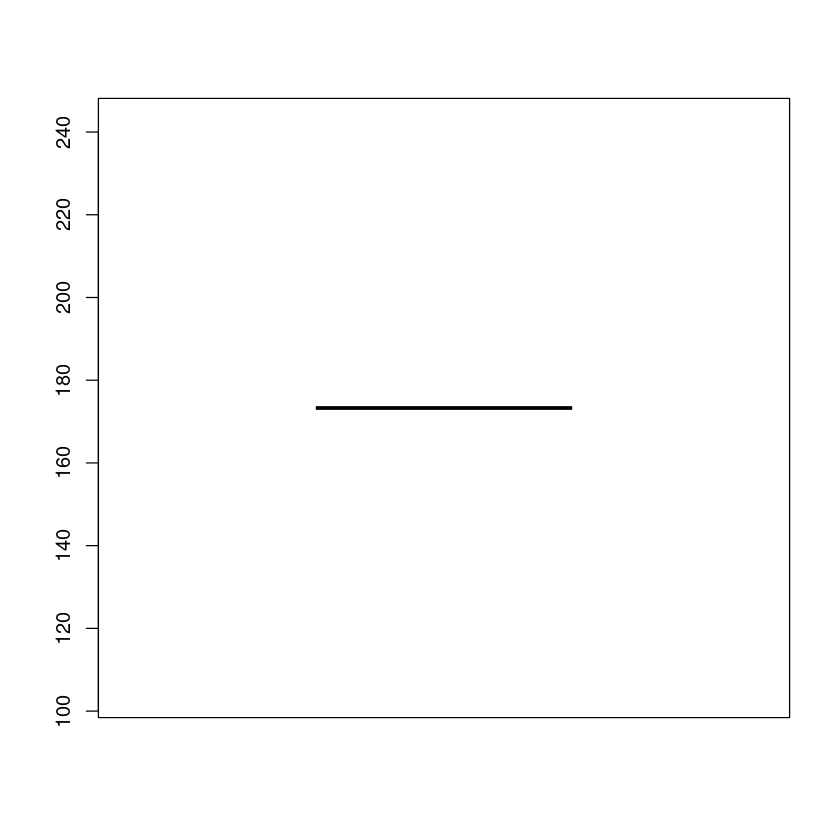

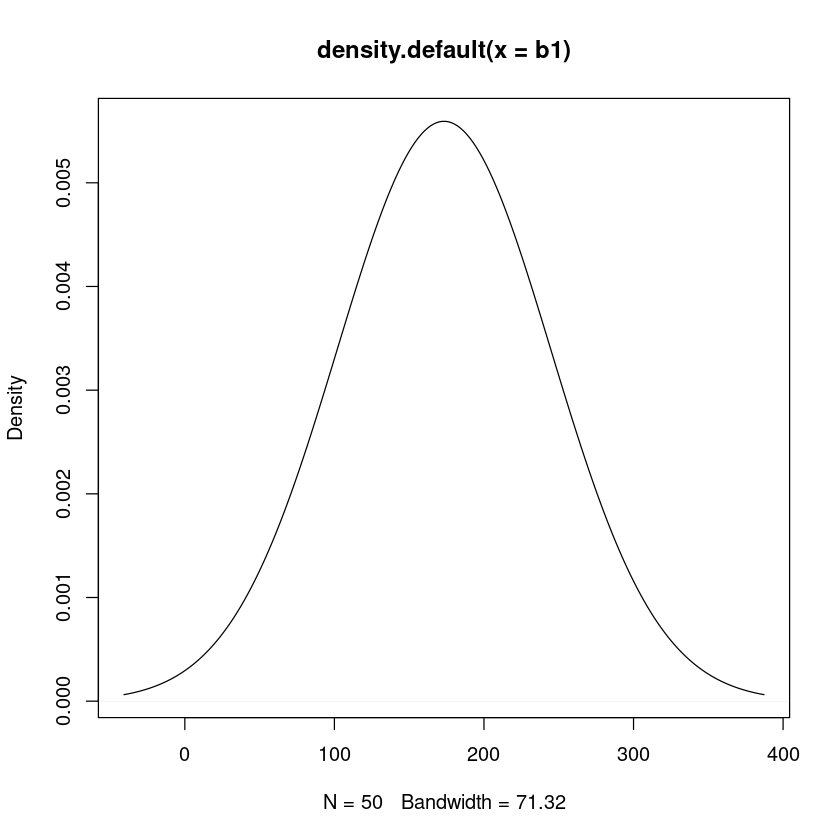

In [172]:
b1 <-lapply(best_o,function(x){
    x[1]
})

b1<-unlist(b1)

skim(b1)

print(quantile(b1, c(0.025,0.975)))

print(sd(b1)/median(b1))

print(paste0("I am the mode, ",mode(b1)))
boxplot(b1)

plot(density(b1))

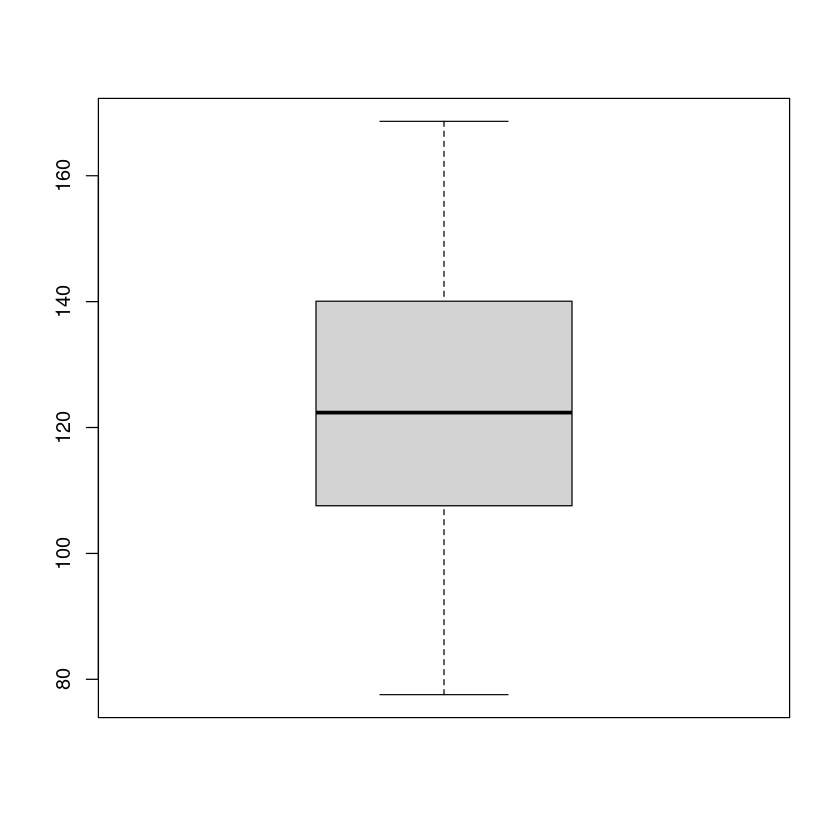

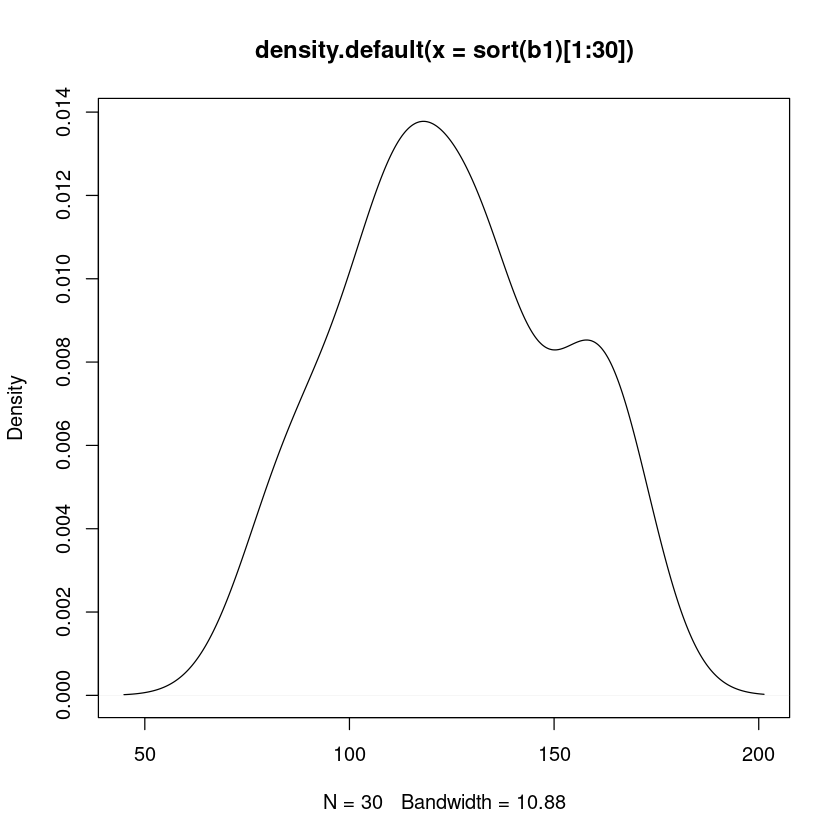

In [170]:
boxplot(sort(b1)[1:30])
plot(density(sort(b1)[1:30]))

Bootstrap strategy 2

In [184]:
siz_o <- dim(data_o)[1]
set.seed(312)
sdata=
inito <- optpar_o$par
#inito <- rep(1,5)

sv <- which(data_o$iso3num_o!=data_o$iso3num_d)


best_o <- lapply(c(1:50) , function(i){

ese <- sample(sv,size=siz_o, replace = T)

objan <- makedata(data_o[ese,..listo],data_o[ese,..lista],data_o$iso3num_o,data_o$iso3num_d)

return( optim(inito, fn = evalo, gr = evalo_g, method = "BFGS",
                simat = objan, strobject = strato, 
                chosen=((38^2)*(3^2)))$par )
})



── Data Summary ────────────────────────
                           Values
Name                       b1    
Number of rows             50    
Number of columns          1     
_______________________          
Column type frequency:           
  numeric                  1     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean    sd    p0   p25   p50   p75
1 data                  0             1  173.     0  173.  173.  173.  173.
   p100 hist 
1  173. ▁▁▇▁▁
    2.5%    97.5% 
173.2798 173.2798 
[1] 0
[1] "I am the mode, numeric"


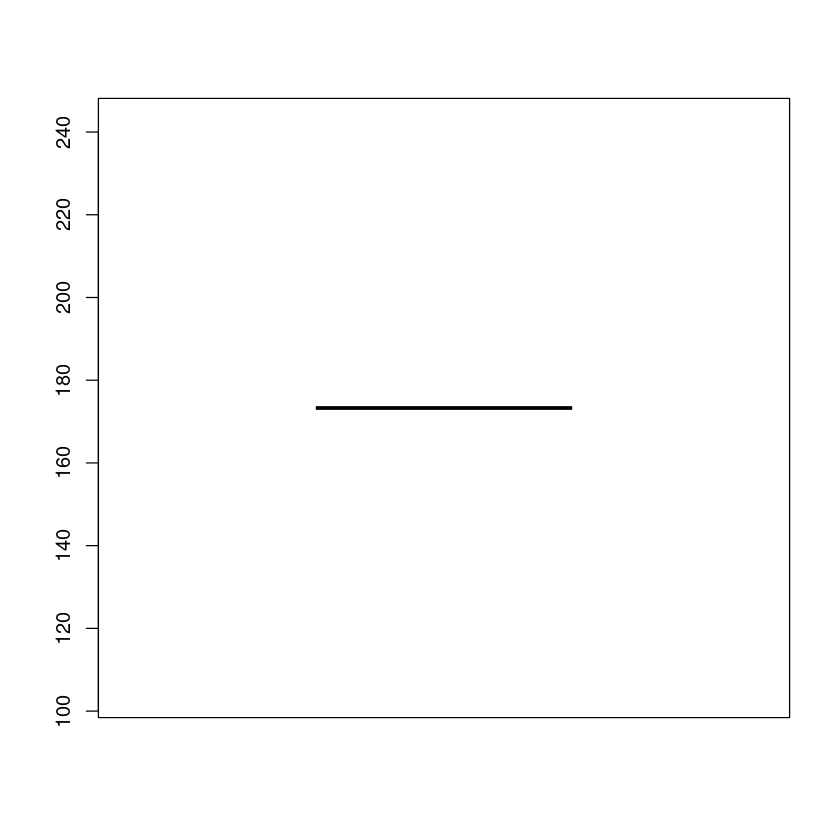

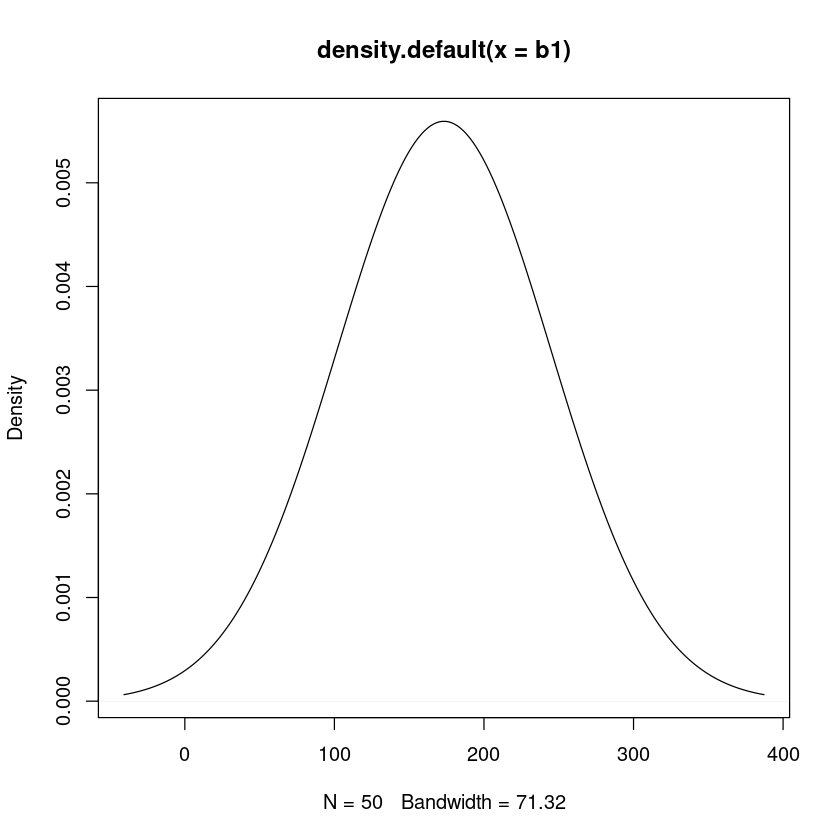

In [185]:
b1 <-lapply(best_o,function(x){
    x[1]
})

b1<-unlist(b1)

skim(b1)

print(quantile(b1, c(0.025,0.975)))

print(sd(b1)/median(b1))

print(paste0("I am the mode, ",mode(b1)))
boxplot(b1)

plot(density(b1))

## Positive sample




In [262]:

cor(data_o$ldist, data_o$tradeflow_imf_d )
listo
data_o %>% filter(across(listo, ~ .x>0)) %>% dplyr::select( iso3num_d,iso3num_o )

[1] -0.1416235

[1] "tradeflow_comtrade_d" "tradeflow_comtrade_o"

iso3num_d,iso3num_o
<int>,<int>
40,36
56,36
124,36
152,36
170,36
203,36
208,36
233,36
246,36


In [386]:
#print(objb[[1]][3])
print(objb[7])

lm(data_o$tourism ~ data_o$ldist + data_o$const+ 0)

$rta
38 x 38 sparse Matrix of class "dgCMatrix"
                                                                               
 [1,] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 [2,] 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 [3,] 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 [4,] 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 [5,] 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [6,] 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 [7,] 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 [8,] 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 [9,] 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
[10,] 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
[11,] 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 


Call:
lm(formula = data_o$tourism ~ data_o$ldist + data_o$const + 0)

Coefficients:
data_o$ldist  data_o$const  
     -162508       1615852  


# checking mat function

In [396]:

set.seed(5)
toy <- as.data.frame(list(iso3=c(1,1,1,8,8,8,16,16,16),iso3d=c(1,8,16,1,8,16,1,8,16)))
toy  <- toy %>% mutate(y1=rbinom(n(),3,.5),y3=rbinom(n(),3,.5),y2=rbinom(n(),3,.5), x1=rbinom(n(),1,.5),
             x2=rbinom(n(),1,.5),x3=rbinom(n(),1,.5), change2=rep(as.integer(-1),n()))


toy <- toy  %>% 
        mutate(across(c(y1,y3,y2,x1,x2,x3), ~ case_when( iso3 > iso3d ~ .x * change2 , T ~ .x )))

toy

toyjb  <-  makedata(dplyr::select(toy,c(y1,y3,y2)),dplyr::select(toy,c(x1,x2,x3)),toy$iso3,toy$iso3d)


library(stargazer)

stargazer(toy)


iso3,iso3d,y1,y3,y2,x1,x2,x3,change2
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,0,2,1,1,1,-1
1,8,2,1,2,0,1,1,-1
1,16,3,1,3,1,0,0,-1
8,1,-1,-1,-2,0,0,-1,-1
8,8,0,2,1,0,1,1,-1
8,16,2,1,1,0,0,0,-1
16,1,-2,-1,-1,0,-1,-1,-1
16,8,-2,-1,-1,0,-1,-1,-1
16,16,3,3,1,0,1,1,-1



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 





% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Mon, Feb 14, 2022 - 12:00:34 AM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lccccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
Statistic & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{St. Dev.} & \multicolumn{1}{c}{Min} & \multicolumn{1}{c}{Pctl(25)} & \multicolumn{1}{c}{Pctl(75)} & \multicolumn{1}{c}{Max} \\ 
\hline \\[-1.8ex] 
iso3 & 9 & 8.333 & 6.500 & 1 & 1 & 16 & 16 \\ 
iso3d & 9 & 8.333 & 6.500 & 1 & 1 & 16 & 16 \\ 
y1 & 9 & 0.667 & 2.000 & $-$2 & $-$1 & 2 & 3 \\ 
y3 & 9 & 0.556 & 1.424 & $-$1 & $-$1 & 1 & 3 \\ 
y2 & 9 & 0.667 & 1.658 & $-$2 & $-$1 & 2 & 3 \\ 
x1 & 9 & 0.222 & 0.441 & 0 & 0 & 0 & 1 \\ 
x2 & 9 & 0.222 & 0.833 & $-$1 & 0 & 1 & 1 \\ 
x3 & 9 & 0.111 & 0.928 & $-$1 & $-$1 & 1 & 1 \\ 
change2 & 9 & $-$1.000 & 0.000 & $-$1 & $-$1 & $-$1 & $-$1 \\ 
\hline \\[-1.8ex] 
\end{tab

In [395]:
set.seed(5)
toy <- as.data.frame(list(iso3=c(1,1,1,2,2,2,3,3,3),iso3d=c(1,2,3,1,2,3,1,2,4)))
toy  <- toy %>% mutate(y1=rbinom(n(),3,.5),y3=rbinom(n(),3,.5),y2=rbinom(n(),3,.5), x1=rbinom(n(),1,.5),
             x2=rbinom(n(),1,.5),x3=rbinom(n(),1,.5), change2=rep(as.integer(-1),n()))


toy <- toy  %>% 
        mutate(across(c(y1,y3,y2,x1,x2,x3), ~ case_when( iso3 > iso3d ~ .x * change2 , T ~ .x )))

toy

toyja  <-  makedata(dplyr::select(toy,c(y1,y3,y2)),dplyr::select(toy,c(x1,x2,x3)),toy$iso3,toy$iso3d)






iso3,iso3d,y1,y3,y2,x1,x2,x3,change2
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,0,2,1,1,1,-1
1,2,2,1,2,0,1,1,-1
1,3,3,1,3,1,0,0,-1
2,1,-1,-1,-2,0,0,-1,-1
2,2,0,2,1,0,1,1,-1
2,3,2,1,1,0,0,0,-1
3,1,-2,-1,-1,0,-1,-1,-1
3,2,-2,-1,-1,0,-1,-1,-1
3,4,3,3,1,0,1,1,-1


ERROR: Error in sparseMatrix(i = row_ID, j = col_ID, x = x, dims = c(ene, ene)): all(dims >= dims.min) is not TRUE


In [363]:
#toyja[[1]][3]
#toyjb[[1]][3]

toyja[4]
toyjb[4]

$x3
3 x 3 sparse Matrix of class "dgCMatrix"
            
[1,]  0  1 0
[2,] -1  0 0
[3,] -1 -1 0


$x3
3 x 3 sparse Matrix of class "dgCMatrix"
            
[1,]  0  1 0
[2,] -1  0 0
[3,] -1 -1 0
